<a href="https://colab.research.google.com/github/ishankagg/Zoomcar_tweets_NLP/blob/main/Zoomcar_tweets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('/Zoom_tweets.csv')

In [ ]:
df

,Unnamed: 0,0
0,0,"Hi @Zoomcar_India , again experienced the same..."
1,1,@Zoomcar_India I had booked a car for 28th apr...
2,2,@DhwaniRathod274 @ZoomcarPUN @ZoomcarBLR @Zoom...
3,3,@Zoomcar_India My concern is not sawing in it....
4,4,My car is being burtally damaged by on going g...
...,...,...
1863,1863,@kingsvignesh We apologize for the inconvenien...
1864,1864,@Maheshw95429081 @Zoomcar_India Very very wors...
1865,1865,@Zoomcar_India @ZoomcarHYD if you unable to pr...
1866,1866,@Zoomcar_India Last 1 month saying same but th...


In [ ]:
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
for i in range(0,len(df)):
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_text_cln = re.sub("(@A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',df.iloc[i,1])
  # Convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # Split sentences into words
  tweets_text_cln = tweets_text_cln.split()
  # Remove English stopwords
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # Stem words to the baseform
  # tweets_text_cln = [ps.stem(x) for x in tweets_texts_cln]
  # join words to form the original sentences, but cleaned-up
  tweets_text_cln = " ".join(tweets_text_cln)
  # Append to the list to get all tweets in one place
  corpus.append(tweets_text_cln)


In [ ]:
bagofwords = []
for i in range(0, 1867):
  words = corpus[i].split()
  bagofwords.append(words)

In [ ]:
bagofwords[0]

['hi',
 'zoomcar',
 'india',
 'experienced',
 'thing',
 'happening',
 'fourth',
 'time',
 'row',
 'sec']

In [ ]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['hi', 'zoomcar', 'india', 'experienced', 'thing', 'happening', 'fourth', 'time', 'row', 'sec']

Most commonly occuring words and frequency



[('zoomcar', 1285),
 ('india', 1106),
 ('car', 398),
 ('inconvenience', 354),
 ('caused', 350),
 ('please', 332),
 ('booking', 231),
 ('hello', 223),
 ('team', 194),
 ('regret', 192),
 ('sorry', 177),
 ('us', 176),
 ('delay', 156),
 ('concern', 145),
 ('apologize', 138),
 ('time', 134),
 ('id', 130),
 ('would', 130),
 ('kindly', 126),
 ('issue', 114)]

In [ ]:
words_to_remove = ['zoomcar', 'india', 'car', 'please', 'hello', 'team', 'us']
bagofwords_new = [[x for x in word if not x in words_to_remove] for word in bagofwords]

In [ ]:
all_words = list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("most commonly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)


['hi', 'experienced', 'thing', 'happening', 'fourth', 'time', 'row', 'sec', 'booked', 'th']

most commonly occuring words and frequency



[('inconvenience', 354),
 ('caused', 350),
 ('booking', 231),
 ('regret', 192),
 ('sorry', 177),
 ('delay', 156),
 ('concern', 145),
 ('apologize', 138),
 ('time', 134),
 ('id', 130),
 ('would', 130),
 ('kindly', 126),
 ('issue', 114),
 ('refund', 113),
 ('host', 111),
 ('request', 106),
 ('check', 101),
 ('get', 98),
 ('help', 96),
 ('responding', 93)]

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(20), columns=['Words', 'Freq'])
freq_word_df.head()

,Words,Freq
0,inconvenience,354
1,caused,350
2,booking,231
3,regret,192
4,sorry,177


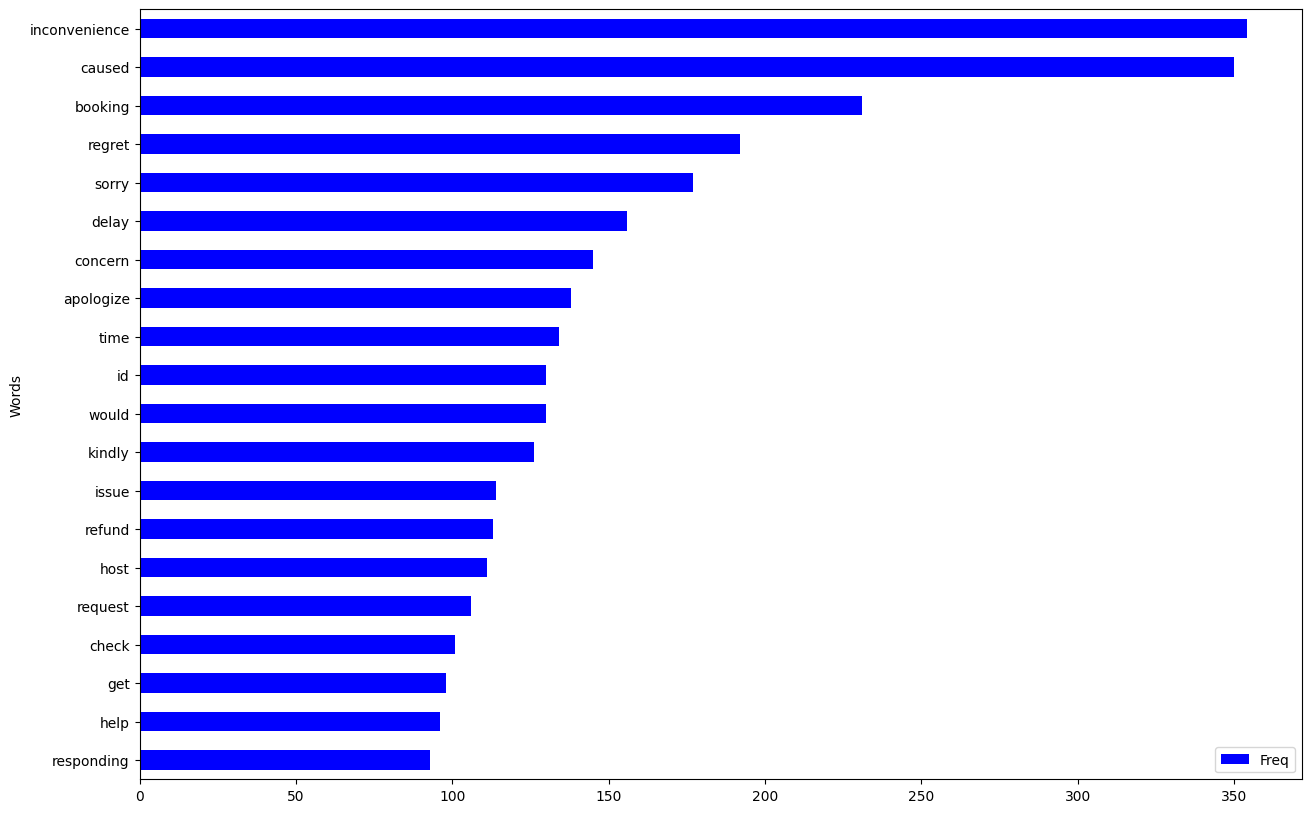

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y='Freq', ax=ax, color = 'blue')
plt.show();

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords=STOPWORDS,
                      background_color='black',
                      max_words=30).generate(word_string)

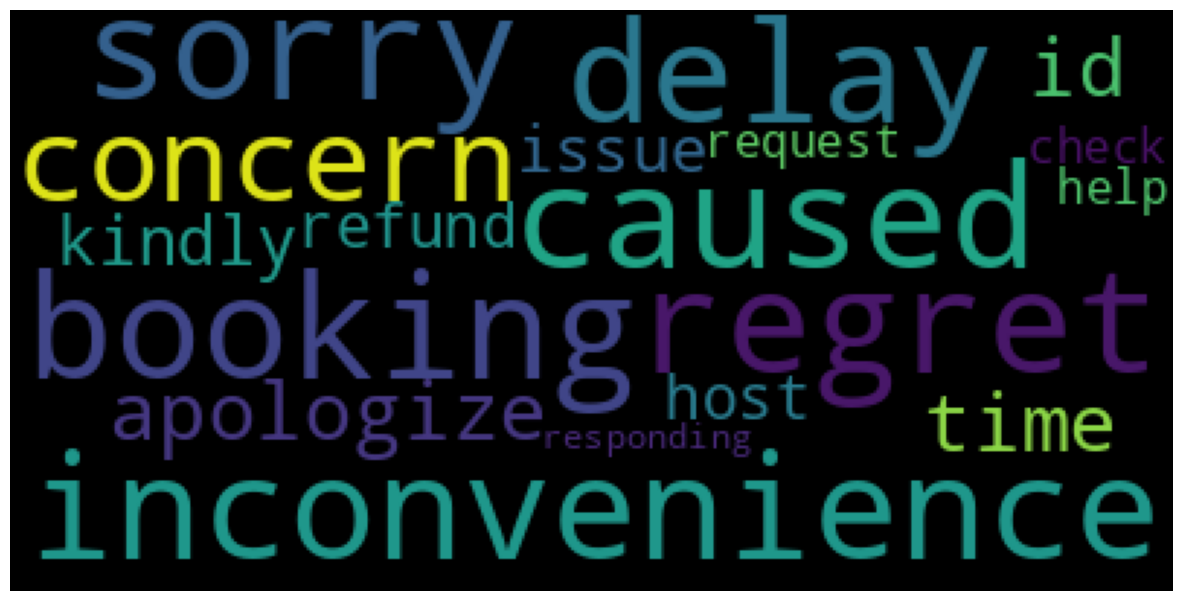

In [ ]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
sentiment_text = [TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.23333333333333336
hi zoomcar india experienced thing happening fourth time row sec


In [ ]:
sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by='Polarity', ascending=False)

,Polarity,Tweet_Text
921,1.0,zoomcar india people something best us per wor...
1786,1.0,abhishek ghosh hello abhishek offered resoluti...
1203,0.8,zoomcar india want remove subscription urgent ...
1501,0.8,zoomcar india zoomcar india response great ser...
791,0.7,zoomcar india still waiting response fair
...,...,...
1343,-1.0,zoomcar india terrible experience zoomcar book...
317,-1.0,zoomcar india worst customer service ever canc...
385,-1.0,pathetic response zoomcar noone reply query us...
36,-1.0,worst experience zoomcar india waited hours st...


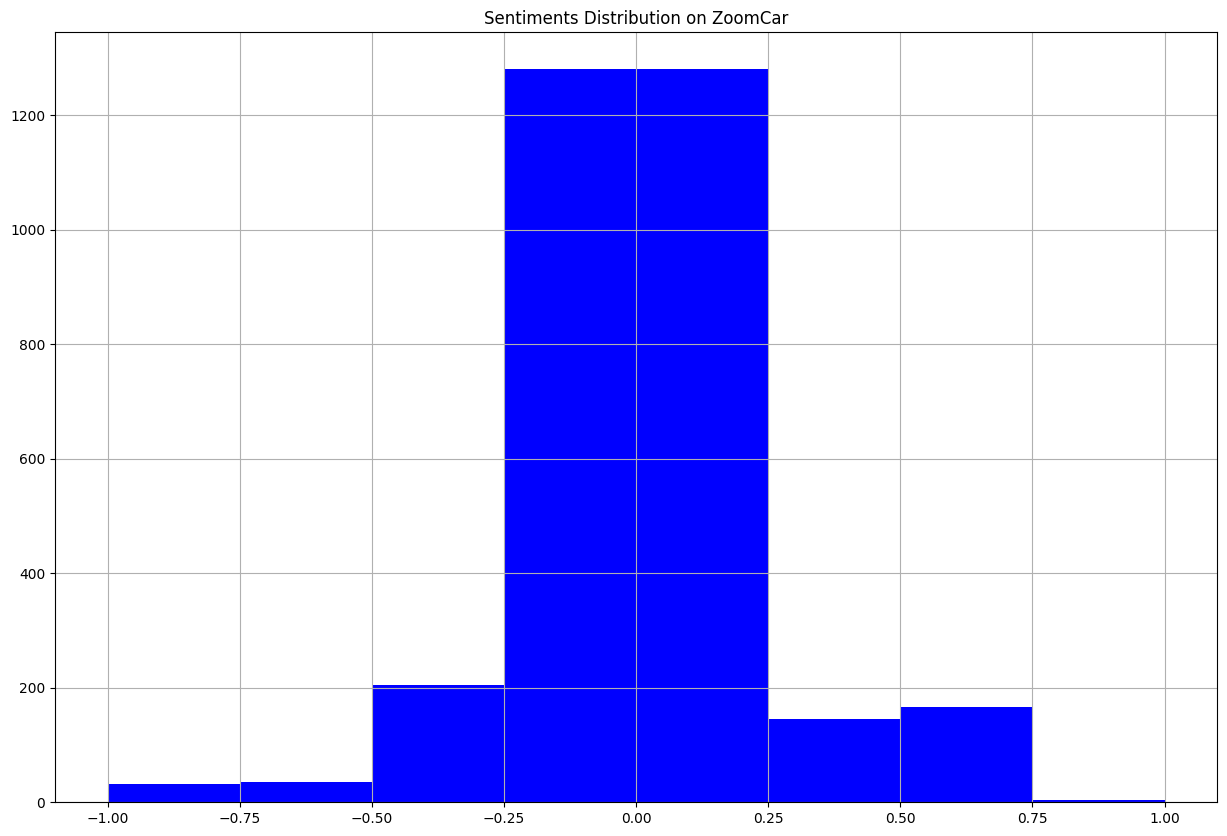

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Ploting Histogram
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='blue')
plt.title("Sentiments Distribution on ZoomCar")
plt.show()